In [20]:
#Initialising the packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  mean_squared_error, mean_absolute_error, r2_score,classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Loading the values of abalone
abalone_data=pd.read_csv(r"C:\\Sai Sri\Abalone_Data.csv")

In [4]:
#Dataset information
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Weight    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell_Weight    4177 non-null   float64
 8   Rings_Category  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
#Replacing null values with 0
abalone_data=abalone_data.fillna(0)

In [6]:
#Dropping certain unrequired variables and creating final feature and target variable
X = abalone_data.drop(['Rings_Category'],axis=1)
Y = abalone_data.loc[:,'Rings_Category']

In [7]:
#Transform categorical data into dummy form 
Sex = pd.get_dummies(X['Sex'],drop_first=True)

In [8]:
#Drop unrequired variables
X.drop(['Sex'],axis=1,inplace=True)

In [9]:
#Forming final independent variable
X = pd.concat([X,Sex],axis=1)

In [10]:
#Forming the final test and training dataset
X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size=0.20,random_state=10)

In [22]:
#KNN Machine Learning training
import warnings
with warnings.catch_warnings(record=True):
    knn_model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
    knn_model.fit(X_train, Y_train)
    prdct1 = knn_model.predict(X_test)
    print('KNN Mean Absolute Error equals:', mean_absolute_error(Y_test, prdct1))
    print('KNN R-squared score equals:',r2_score(Y_test, prdct1))
    print('KNN Root Mean Squared Error equals:', np.sqrt(mean_squared_error(Y_test, prdct1)))
    print('KNN Classification Report equals: \n', classification_report(Y_test, prdct1))

KNN Mean Absolute Error equals: 0.24401913875598086
KNN R-squared score equals: 0.02324702324702299
KNN Root Mean Squared Error equals: 0.4939829336687461
KNN Classification Report equals: 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       429
           1       0.80      0.66      0.72       407

    accuracy                           0.76       836
   macro avg       0.76      0.75      0.75       836
weighted avg       0.76      0.76      0.75       836



In [23]:
#Random Forest Machine Learning training
import warnings
with warnings.catch_warnings(record=True):
    rforest_model = RandomForestClassifier(random_state=5)
    rforest_model.fit(X_train, Y_train)
    prdct2 = rforest_model.predict(X_test)
    print('Random Forest Mean Absolute Error equals:', mean_absolute_error(Y_test, prdct2))
    print('Random Forest R-squared score equals:',r2_score(Y_test, prdct2))
    print('Random Forest Root Mean Squared Error equals:', np.sqrt(mean_squared_error(Y_test, prdct2)))
    print('Random Forest Classification Report equals: \n', classification_report(Y_test, prdct2))

Random Forest Mean Absolute Error equals: 0.19617224880382775
Random Forest R-squared score equals: 0.2147672147672146
Random Forest Root Mean Squared Error equals: 0.4429133648963731
Random Forest Classification Report equals: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       429
           1       0.79      0.82      0.80       407

    accuracy                           0.80       836
   macro avg       0.80      0.80      0.80       836
weighted avg       0.80      0.80      0.80       836



In [24]:
#Decision Tree Machine Learning training
import warnings
with warnings.catch_warnings(record=True):
    dtree_model = DecisionTreeClassifier()
    dtree_model.fit(X_train, Y_train)
    prdct3 = dtree_model.predict(X_test)
    print('Decision Tree Mean Absolute Error equals:', mean_absolute_error(Y_test, prdct3))
    print('Decision Tree R-squared score equals:',r2_score(Y_test, prdct3))
    print('Decision Tree Root Mean Squared Error equals:', np.sqrt(mean_squared_error(Y_test, prdct3)))
    print('Decision Tree Classification Report equals: \n', classification_report(Y_test, prdct3))

Decision Tree Mean Absolute Error equals: 0.2942583732057416
Decision Tree R-squared score equals: -0.1778491778491782
Decision Tree Root Mean Squared Error equals: 0.5424558721276244
Decision Tree Classification Report equals: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       429
           1       0.71      0.66      0.69       407

    accuracy                           0.71       836
   macro avg       0.71      0.70      0.70       836
weighted avg       0.71      0.71      0.71       836



In [14]:
#PCA Clustering
pca = PCA()
value = X.values
pca.fit(value)
abalone_pca = pca.transform(value)

Text(0, 0.5, 'PC 2')

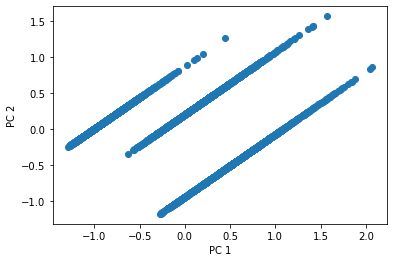

In [15]:
#Visualisation of the principal components
axs = plt.gca()
axs.scatter(abalone_pca[:,0], abalone_pca[:,1])
axs.set_xlabel('PC 1')
axs.set_ylabel('PC 2')

[Text(0, 0, 'PC0'),
 Text(1, 0, 'PC1'),
 Text(2, 0, 'PC2'),
 Text(3, 0, 'PC3'),
 Text(4, 0, 'PC4'),
 Text(5, 0, 'PC5'),
 Text(6, 0, 'PC6'),
 Text(7, 0, 'PC7'),
 Text(8, 0, 'PC8')]

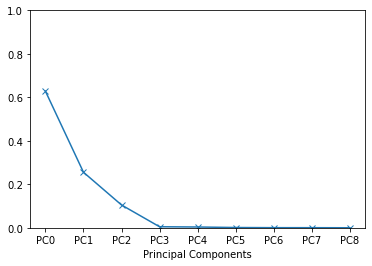

In [17]:
#Scree plot visualisation for PCA clustering
axs = plt.gca()
expl_var = pca.explained_variance_ratio_
axs.plot(expl_var, marker='x')
axs.set_ylim(0,1.)
axs.set_xlabel('Principal Components')
axs.set_xticks([0,1,2,3,4,5,6,7,8])
axs.set_xticklabels(["PC{}".format(i) for i in range(9)])

In [18]:
#Principal component explanation
print(pca.explained_variance_ratio_)

[6.28424710e-01 2.55498923e-01 1.04980433e-01 4.81946974e-03
 3.63529813e-03 1.31111958e-03 6.10877709e-04 5.35045819e-04
 1.84123115e-04]
